In [100]:
import statsmodels.formula.api as smf
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# read the original file
df = pd.read_csv("King_County_house_prices_dataset.csv")

# convert variables
# following variables are in thousand dollars and sqft
df["price"] = df["price"].apply(lambda x: x*0.001)
df["sqft_lot"] = df["sqft_lot"].apply(lambda x: x*0.001)
df["sqft_living"] = df["sqft_living"].apply(lambda x: x*0.001)
df["sqft_above"] = df["sqft_above"].apply(lambda x: x*0.001)
df["sqft_living15"] = df["sqft_living15"].apply(lambda x: x*0.001)
df["sqft_lot15"] = df["sqft_lot15"].apply(lambda x: x*0.001)

df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221.900,3,1.00,1.18,5.650,1.0,NaN,0.0,...,7,1.18,0.0,1955,0.0,98178,47.5112,-122.257,1.34,5.650
1,6414100192,12/9/2014,538.000,3,2.25,2.57,7.242,2.0,0.0,0.0,...,7,2.17,400.0,1951,1991.0,98125,47.7210,-122.319,1.69,7.639
2,5631500400,2/25/2015,180.000,2,1.00,0.77,10.000,1.0,0.0,0.0,...,6,0.77,0.0,1933,NaN,98028,47.7379,-122.233,2.72,8.062
3,2487200875,12/9/2014,604.000,4,3.00,1.96,5.000,1.0,0.0,0.0,...,7,1.05,910.0,1965,0.0,98136,47.5208,-122.393,1.36,5.000
4,1954400510,2/18/2015,510.000,3,2.00,1.68,8.080,1.0,0.0,0.0,...,8,1.68,0.0,1987,0.0,98074,47.6168,-122.045,1.80,7.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360.000,3,2.50,1.53,1.131,3.0,0.0,0.0,...,8,1.53,0.0,2009,0.0,98103,47.6993,-122.346,1.53,1.509
21593,6600060120,2/23/2015,400.000,4,2.50,2.31,5.813,2.0,0.0,0.0,...,8,2.31,0.0,2014,0.0,98146,47.5107,-122.362,1.83,7.200
21594,1523300141,6/23/2014,402.101,2,0.75,1.02,1.350,2.0,0.0,0.0,...,7,1.02,0.0,2009,0.0,98144,47.5944,-122.299,1.02,2.007
21595,291310100,1/16/2015,400.000,3,2.50,1.60,2.388,2.0,NaN,0.0,...,8,1.60,0.0,2004,0.0,98027,47.5345,-122.069,1.41,1.287


# Outliers

In [110]:
df = df.query("bedrooms < 33")

df = df.query("price < 1970.0")

df = df.query("sqft_lot < 107.157")

df = df.query("sqft_lot15 < 96.34557399999838")


df.shape

(14877, 21)

## Dummies

In [ ]:
#print(df.waterfront.nunique())
#print(df.grade.nunique())
#print(df.condition.nunique())
#print(df.view.nunique())



In [ ]:
#waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)
#grade_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
#condition_dummies = pd.get_dummies(df['condition'], prefix='cd', drop_first=True)
#view_dummies = pd.get_dummies(df['view'], prefix='vw', drop_first=True)
#view_dummies

Remove the original columns from df and add the dummy variables

In [ ]:
#df = df.drop(['waterfront','grade','condition', 'view'], axis=1)

In [ ]:
#df = pd.concat([df, waterfront_dummies, grade_dummies, condition_dummies, view_dummies ], axis=1)
#df.head()

## Heatmap for correlations

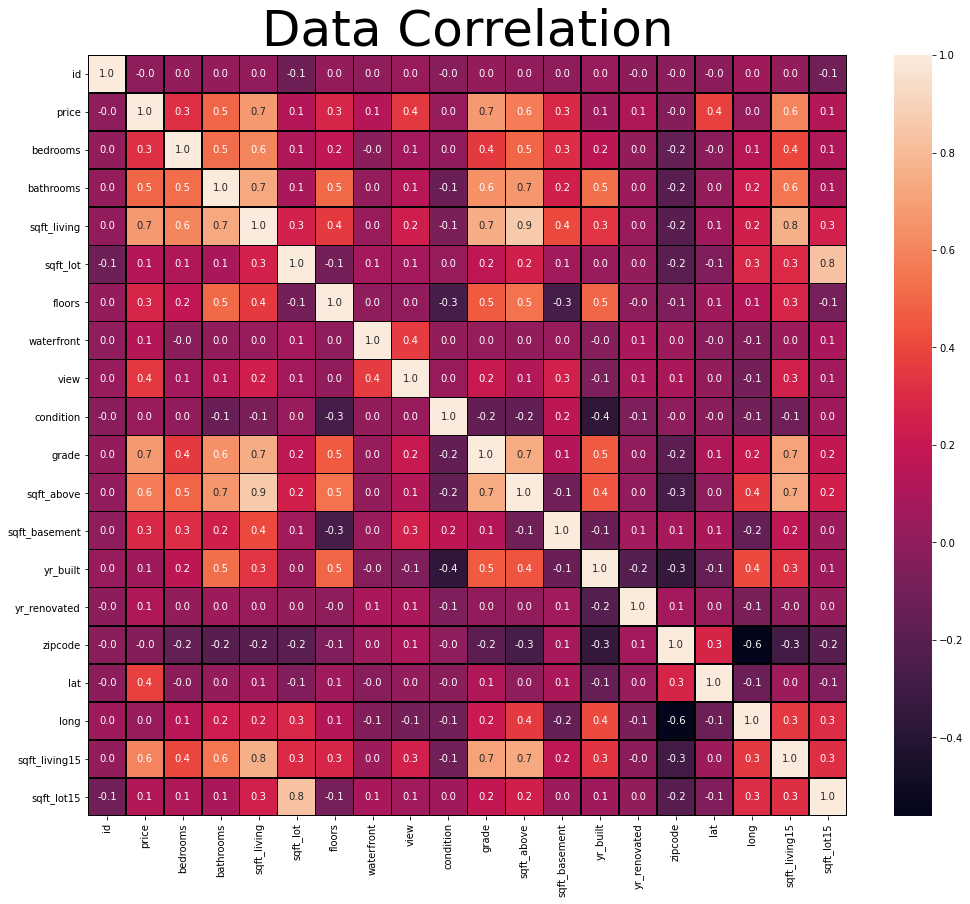

In [111]:
plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

### Explanatory Variables

In [114]:
explanatory_vars = list(df.columns)
explanatory_vars

print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=df).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))
    
# sales predicting salesis included as explanatory variable for sanity check

R squared for each possible explanatory variable:
id      	 	= 1.81e-05
date    	 	= 0.0279
price   	 	= 1.0
bedrooms 	 	= 0.103
bathrooms 	 	= 0.248
sqft_living 	 	= 0.458
sqft_lot 	 	= 0.0172
floors  	 	= 0.0761
waterfront 	 	= 0.0193
view    	 	= 0.123
condition 	 	= 0.00125
grade   	 	= 0.456
sqft_above 	 	= 0.333
sqft_basement 	 	= 0.0826
yr_built 	 	= 0.0031
yr_renovated 	 	= 0.0147
zipcode 	 	= 0.0018
lat     	 	= 0.144
long    	 	= 0.00105
sqft_living15 	 	= 0.363
sqft_lot15 	 	= 0.0161


In [87]:
df.shape

(20854, 21)

## Split the data in training and test set

In [116]:
# dropna because otherwise an errormesssage came up
df = df.dropna()

In [117]:
x = df
y = df.price

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Find the best fitting line

In [118]:
model1 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living + sqft_lot + floors +  sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + waterfront + view + grade+ condition', data=xTrain).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1747.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:44:16   Log-Likelihood:                -76636.
No. Observations:               11901   AIC:                         1.533e+05
Df Residuals:                   11883   BIC:                         1.534e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4971.3161   2976.585      1.670      0.095    -863.278    1.08e+04
bedrooms        -20.4296      2.035    -10.038      0.000     -24.419     -16.440
bathrooms        33.5494      3.352     10.009      0.000      26.979      40.119
sqft_living      55.8536      2.013     27.742      0.000      51.907      59.800
sqft_lot          0.1191      0.226      0.526      0.599      -0.325       0.563
floors           22.3896      3.773      5.934      0.000      14.994      29.786
sqft_above       55.8535      2.013     27.742      0.000      51.907      59.800
sqft_basement     0.0452      0.004     10.843      0.000       0.037       0.053
yr_built         -2.3336      0.074    -31.338      0.000      -2.480      -2.188
yr_renovated      0.0238      0.004      6.326      0.000       0.016       0.031
zipcode          -0.4407      0.033    -13.261      0.000      -0.506      -0.376
lat             594.5794     10.906     54.517      0.000     573.201     615.958
long           -114.0593     13.780     -8.277      0.000    -141.071     -87.048
sqft_living15    47.8651      3.693     12.960      0.000      40.626      55.104
sqft_lot15       -1.4437      0.274     -5.268      0.000      -1.981      -0.907
waterfront      306.4707     20.875     14.681      0.000     265.553     347.389
view             45.8589      2.259     20.304      0.000      41.432      50.286
grade            91.7140      2.247     40.819      0.000      87.310      96.118
condition        28.8660      2.386     12.098      0.000      24.189      33.543
==============================================================================
Omnibus:                     3606.241   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20229.076
Skew:                           1.342   Prob(JB):                         0.00
Kurtosis:                       8.796   Cond. No.                     4.17e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.58e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### remove sqft_lot

In [119]:
model2 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + +floors + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + waterfront + view + grade+ condition', data=xTrain).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1856.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:44:20   Log-Likelihood:                -76636.
No. Observations:               11901   AIC:                         1.533e+05
Df Residuals:                   11884   BIC:                         1.534e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5049.8607   2972.750      1.699      0.089    -777.216    1.09e+04
bedrooms        -20.4426      2.035    -10.045      0.000     -24.432     -16.454
bathrooms        33.4909      3.350      9.998      0.000      26.925      40.057
sqft_living      55.9439      2.006     27.889      0.000      52.012      59.876
floors           22.2849      3.768      5.915      0.000      14.899      29.670
sqft_above       55.9439      2.006     27.889      0.000      52.012      59.876
sqft_basement     0.0453      0.004     10.860      0.000       0.037       0.053
yr_built         -2.3349      0.074    -31.370      0.000      -2.481      -2.189
yr_renovated      0.0238      0.004      6.322      0.000       0.016       0.031
zipcode          -0.4411      0.033    -13.274      0.000      -0.506      -0.376
lat             594.5099     10.905     54.516      0.000     573.134     615.886
long           -113.7434     13.767     -8.262      0.000    -140.728     -86.758
sqft_living15    47.8340      3.693     12.954      0.000      40.596      55.072
sqft_lot15       -1.3300      0.169     -7.890      0.000      -1.660      -1.000
waterfront      306.3737     20.873     14.678      0.000     265.459     347.289
view             45.8699      2.258     20.310      0.000      41.443      50.297
grade            91.7088      2.247     40.819      0.000      87.305      96.113
condition        28.8133      2.384     12.087      0.000      24.141      33.486
==============================================================================
Omnibus:                     3604.892   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20200.209
Skew:                           1.342   Prob(JB):                         0.00
Kurtosis:                       8.791   Cond. No.                     4.01e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### remove sqft_above and sqft_living15 beacause of multicollinearity

In [120]:
model3 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + sqft_basement + yr_built + yr_renovated + zipcode + lat + long  + sqft_lot15 + waterfront + view + grade+ condition', data=xTrain).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     2075.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:44:22   Log-Likelihood:                -76730.
No. Observations:               11901   AIC:                         1.535e+05
Df Residuals:                   11886   BIC:                         1.536e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9709.4367   2901.004      3.347      0.001    4022.995    1.54e+04
bedrooms        -21.6826      2.049    -10.584      0.000     -25.698     -17.667
bathrooms        37.4270      3.253     11.507      0.000      31.052      43.803
sqft_living     135.9721      3.639     37.361      0.000     128.838     143.106
sqft_basement    -0.0290      0.004     -7.131      0.000      -0.037      -0.021
yr_built         -2.3075      0.073    -31.526      0.000      -2.451      -2.164
yr_renovated      0.0213      0.004      5.622      0.000       0.014       0.029
zipcode          -0.4684      0.033    -14.119      0.000      -0.533      -0.403
lat             604.0894     10.945     55.195      0.000     582.636     625.543
long            -93.5628     13.698     -6.830      0.000    -120.413     -66.713
sqft_lot15       -1.2204      0.166     -7.362      0.000      -1.545      -0.895
waterfront      305.9469     21.032     14.547      0.000     264.721     347.173
view             50.8183      2.245     22.638      0.000      46.418      55.218
grade           100.4589      2.169     46.307      0.000      96.206     104.711
condition        26.6207      2.397     11.107      0.000      21.923      31.319
==============================================================================
Omnibus:                     3495.231   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19116.204
Skew:                           1.304   Prob(JB):                         0.00
Kurtosis:                       8.634   Cond. No.                     2.03e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Remove categorials

In [123]:
model4 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + sqft_basement + yr_built + yr_renovated + zipcode + lat + long  + sqft_lot15', data=xTrain).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1930.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:45:04   Log-Likelihood:                -78350.
No. Observations:               11901   AIC:                         1.567e+05
Df Residuals:                   11890   BIC:                         1.568e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1005.8948   3264.246     -0.308      0.758   -7404.352    5392.562
bedrooms        -45.2592      2.300    -19.681      0.000     -49.767     -40.752
bathrooms        57.5342      3.697     15.561      0.000      50.287      64.781
sqft_living     249.6861      3.334     74.887      0.000     243.151     256.222
sqft_basement    -0.0520      0.004    -11.701      0.000      -0.061      -0.043
yr_built         -1.9275      0.076    -25.326      0.000      -2.077      -1.778
yr_renovated      0.0282      0.004      6.622      0.000       0.020       0.036
zipcode          -0.5292      0.038    -14.082      0.000      -0.603      -0.456
lat             666.3151     12.259     54.355      0.000     642.286     690.344
long           -205.1442     15.530    -13.209      0.000    -235.586    -174.702
sqft_lot15       -0.4466      0.189     -2.369      0.018      -0.816      -0.077
==============================================================================
Omnibus:                     3474.507   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17267.621
Skew:                           1.327   Prob(JB):                         0.00
Kurtosis:                       8.271   Cond. No.                     2.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Added grade because of high r squared value

In [124]:
model5 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + sqft_basement + yr_built + yr_renovated + zipcode + lat + long  + sqft_lot15 + grade ', data=xTrain).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2295.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:45:21   Log-Likelihood:                -77311.
No. Observations:               11901   AIC:                         1.546e+05
Df Residuals:                   11889   BIC:                         1.547e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6621.9311   2995.708      2.210      0.027     749.853    1.25e+04
bedrooms        -27.7045      2.139    -12.950      0.000     -31.898     -23.511
bathrooms        40.6113      3.407     11.921      0.000      33.933      47.289
sqft_living     141.9114      3.802     37.325      0.000     134.459     149.364
sqft_basement    -0.0070      0.004     -1.679      0.093      -0.015       0.001
yr_built         -2.7649      0.072    -38.440      0.000      -2.906      -2.624
yr_renovated      0.0218      0.004      5.587      0.000       0.014       0.029
zipcode          -0.4314      0.035    -12.506      0.000      -0.499      -0.364
lat             566.2696     11.429     49.548      0.000     543.868     588.672
long           -111.5533     14.367     -7.764      0.000    -139.716     -83.391
sqft_lot15       -0.7739      0.173     -4.476      0.000      -1.113      -0.435
grade           107.6156      2.259     47.631      0.000     103.187     112.044
==============================================================================
Omnibus:                     3888.672   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21852.860
Skew:                           1.460   Prob(JB):                         0.00
Kurtosis:                       8.962   Cond. No.                     2.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Performance on train set

In [125]:
y_train_pred1 = model1.predict(xTrain)
y_train_pred2 = model2.predict(xTrain)
y_train_pred3 = model3.predict(xTrain)
y_train_pred4 = model4.predict(xTrain)
y_train_pred5 = model5.predict(xTrain)

In [126]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse1 = sqrt(mean_squared_error(yTrain, y_train_pred1))
rmse2 = sqrt(mean_squared_error(yTrain, y_train_pred2))
rmse3 = sqrt(mean_squared_error(yTrain, y_train_pred3))
rmse4 = sqrt(mean_squared_error(yTrain, y_train_pred4))
rmse5 = sqrt(mean_squared_error(yTrain, y_train_pred5))
#statsmodels.tools.eval_measures.rmse(y_train_pred, yTrain)
print("rmse1: ", rmse1)
print("rmse2: ", rmse2)
print("rmse3: ", rmse3)
print("rmse4: ", rmse4)
print("rmse4: ", rmse5)

rmse1:  151.48980798318914
rmse2:  151.4915730469018
rmse3:  152.6966655268421
rmse4:  174.96073697201285
rmse4:  160.330973032084


### Performance on test set

In [98]:
y_test_pred1 = model1.predict(xTest)
y_test_pred2 = model2.predict(xTest)
y_test_pred3 = model3.predict(xTest)
y_test_pred4 = model4.predict(xTest)
y_test_pred5 = model5.predict(xTest)

In [99]:
rmse1 = sqrt(mean_squared_error(yTest, y_test_pred1))
rmse2 = sqrt(mean_squared_error(yTest, y_test_pred2))
rmse3 = sqrt(mean_squared_error(yTest, y_test_pred3))
rmse4 = sqrt(mean_squared_error(yTest, y_test_pred4))
rmse5 = sqrt(mean_squared_error(yTest, y_test_pred5))
#statsmodels.tools.eval_measures.rmse(y_train_pred, yTrain)
print("rmse1: ", rmse1)
print("rmse2: ", rmse2)
print("rmse3: ", rmse3)
print("rmse4: ", rmse4)
rint("rmse5: ", rmse5)

rmse1:  146.61876076246628
rmse2:  146.6031461585679
rmse3:  148.06275280236264
rmse4:  167.54265902335277
